In [1]:
%matplotlib inline
from matplotlib.colors import LogNorm
from nansat import *

In [2]:
# Open source data:
# Access local SMOS data downloaded from http://cp34-bec.cmima.csic.es/
n_smos = Nansat('BEC_OI_____B_20100811T003802_20100820T004052_2013001_025_001.nc')
# Access local TOPAZ data
n_topaz = Nansat('TP4DAILY_2010_222.nc')

=>Sea Surface Salinity L3 OI map<=
=>tecconv generated fields<=


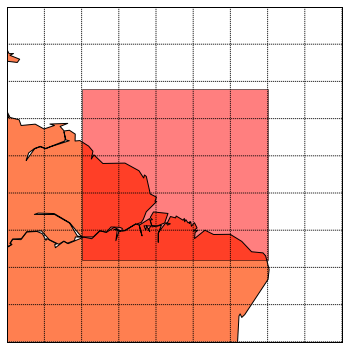

In [3]:
# Define region of interest near Amazon esturay
dstDomain = Domain(NSR().wkt, '-te -60 -6 -35 15 -tr 0.1 0.1')
dstDomain.write_map('aa.png', pltshow=True)
lon, lat = dstDomain.get_geolocation_grids()

# Collocate datasets on the same grid
n_smos.reproject(dstDomain)
n_topaz.reproject(dstDomain)

In [4]:
# Fetch equal-size arrays of data

# Fetch sea surface salinity from SMOS-BEC
sss = n_smos['SSS']

# Fetch eastward and northward components of surface current from TOPAZ
u = n_topaz['utot01']
v = n_topaz['vtot01']

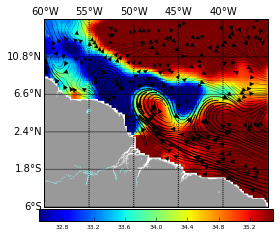

In [6]:
# Create map comparing SSS from MODIS and surface currents from TOPAZ

# create map canvas
nmap = Nansatmap(dstDomain, resolution='h')
# show MODIS SSS distribution
nmap.imshow(sss, vmin=32.5, vmax=35.5)
# plot streamlines of surface current
nmap.streamplot(lon, lat, u, v, 3, linewidth=np.hypot(u, v), color='k')
# add colorbar and save the plot
nmap.add_colorbar(shrink=0.7)
nmap.drawgrid()
nmap.save('test.png', dpi=300)

In [ ]:
plt.savefig?